<a href="https://colab.research.google.com/github/r-igor-s/MN/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import requests

Завдання 1

Автор: Романенко Ігор Сергійович ФІТ 4-9

Обробка та наліз ВВП країн. Датсет було отримано з Вікіпедії з використанням бібліотеки Pandas

  1. Вивести перші 5 рядків датасета

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)   # зчитати всі таблиці
df = tables[2]                # потрібна таблиця (може змінюватись!), номери не є сталими!
df.head()

/tmp/ipython-input-3107767188.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)   # зчитати всі таблиці


,Country/Territory,IMF (2025)[6],World Bank (2024)[7],United Nations (2023)[8]
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495


2. Визначити розмір датасета

In [5]:
df.columns

Index(['Country/Territory', 'IMF (2025)[6]', 'World Bank (2024)[7]',
       'United Nations (2023)[8]'],
      dtype='object')

3. Визначити оптимальну кількість стовпців (видалити зайві)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[6]             222 non-null    object
 2   World Bank (2024)[7]      222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


4. Замінити значення "-" на значення NaN.

In [21]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  # прибрати [1], [6], ...
              .str.replace('Country/Territory', 'Country', regex=False))
df

,Country,IMF(2025),WorldBank(2024),UnitedNations(2023)
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495
...,...,...,...,...
217,Kiribati,321,308,289
218,Marshall Islands,302,280,270
219,Nauru,172,160,176
220,Montserrat,—,—,80


In [22]:
df.isnull().sum()

,0
Country,0
IMF(2025),0
WorldBank(2024),0
UnitedNations(2023),0


5. Ще раз вивести датасет

In [25]:
df['IMF(2025)'] = pd.to_numeric(df['IMF(2025)'], errors='coerce')
df['WorldBank(2024)'] = pd.to_numeric(df['WorldBank(2024)'], errors='coerce')
df['UnitedNations(2023)'] = pd.to_numeric(df['UnitedNations(2023)'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Country                 object
IMF(2025)              float64
WorldBank(2024)        float64
UnitedNations(2023)    float64
dtype: object


,Country,IMF(2025),WorldBank(2024),UnitedNations(2023)
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,29184890.0,27720700.0
2,China[n 1],19398577.0,18743803.0,17794782.0
3,Germany,5013574.0,4659929.0,4525704.0
4,Japan,4279828.0,4026211.0,4204495.0
5,India,4125213.0,3912686.0,3575778.0
6,United Kingdom,3958780.0,3643834.0,3380855.0
7,France,3361557.0,3162079.0,3051832.0
8,Italy,2543677.0,2372775.0,2300941.0
9,Russia,2540656.0,2173836.0,2008419.0


In [26]:
df.isnull().sum()

,0
Country,0
IMF(2025),31
WorldBank(2024),12
UnitedNations(2023),9


In [27]:
# Replace NaN with mean of the row. Ignore first column (Country)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

df.isnull().sum()

,0
Country,0
IMF(2025),0
WorldBank(2024),0
UnitedNations(2023),0


In [28]:
df

,Country,IMF(2025),WorldBank(2024),UnitedNations(2023)
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,29184890.0,27720700.0
2,China[n 1],19398577.0,18743803.0,17794782.0
3,Germany,5013574.0,4659929.0,4525704.0
4,Japan,4279828.0,4026211.0,4204495.0
...,...,...,...,...
217,Kiribati,321.0,308.0,289.0
218,Marshall Islands,302.0,280.0,270.0
219,Nauru,172.0,160.0,176.0
220,Montserrat,80.0,80.0,80.0


6. Перевірити наявність дублікатів.

In [29]:
# Check for duplicates and drop them
df.duplicated().sum()

np.int64(0)

In [30]:
#df.drop_duplicates(inplace=Ture)

7. Вивести описову статистику датасету describe()

In [31]:
df.describe()

,IMF(2025),WorldBank(2024),UnitedNations(2023)
count,2.220000e+02,2.220000e+02,2.220000e+02
mean,1.056422e+06,1.001725e+06,9.315127e+05
std,8.221125e+06,7.815457e+06,7.111560e+06
min,5.800000e+01,6.200000e+01,6.800000e+01
25%,7.207500e+03,7.145500e+03,6.768250e+03
50%,3.456700e+04,3.300050e+04,3.047200e+04
75%,2.591215e+05,2.216550e+05,2.129165e+05
max,1.171654e+08,1.113264e+08,1.008348e+08


8. Визначити відхилення між показниками

In [39]:
df['IMF_WB_Diff'] = abs(df['IMF(2025)'] - df['WorldBank(2024)'])

max_diff = df['IMF_WB_Diff'].max()

country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

World has the largest difference between IMF and WB: 5839024.0


,Country,IMF(2025),WorldBank(2024),UnitedNations(2023),IMF_WB_Diff
0,World,117165394.0,111326370.0,100834796.0,5839024.0
1,United States,30615743.0,29184890.0,27720700.0,1430853.0
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0
3,Germany,5013574.0,4659929.0,4525704.0,353645.0
4,Japan,4279828.0,4026211.0,4204495.0,253617.0
5,India,4125213.0,3912686.0,3575778.0,212527.0
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0
7,France,3361557.0,3162079.0,3051832.0,199478.0
8,Italy,2543677.0,2372775.0,2300941.0,170902.0
9,Russia,2540656.0,2173836.0,2008419.0,366820.0


9. Обчислити кореляцію між поканиками. Які пари змінних мають найвищу кореляцію

In [40]:
# Calculate correlation between IMF and WB and UN
cor_IMF_WB = df['IMF(2025)'].corr(df['WorldBank(2024)'])
cor_IMF_UN = df['IMF(2025)'].corr(df['UnitedNations(2023)'])
cor_WB_UN = df['WorldBank(2024)'].corr(df['UnitedNations(2023)'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.9999887187985104
Correlation between IMF and UN: 0.9998448699448665
Correlation between WB and UN: 0.9998794716612106


In [41]:
# Find highest correlation
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

IMF and WB have the highest correlation


10. Обчислити середнжє значення для кожного стовпця

In [45]:
# Find mean of IMF, WB and UN
mean_IMF = df['IMF(2025)'].mean()
mean_WB = df['WorldBank(2024)'].mean()
mean_UN = df['UnitedNations(2023)'].mean()

print(f'Mean for IMF(2025): {mean_IMF}')
print(f'Mean for WorldBank(2024): {mean_WB}')
print(f'Mean for UnitedNations(2023): {mean_UN}')

Mean for IMF(2025): 1056422.2836936938
Mean for WorldBank(2024): 1001725.3828828828
Mean for UnitedNations(2023): 931512.7297297297


11. Обчисліть стандартне відхилення показниів для кожної країни. Яка країна має найвищу варіативнісьу показниках між роками?

In [46]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

World has the highest standard deviation: 52405624.12461428


,Country,IMF(2025),WorldBank(2024),UnitedNations(2023),IMF_WB_Diff,std
0,World,117165394.0,111326370.0,100834796.0,5839024.0,5.240562e+07
1,United States,30615743.0,29184890.0,27720700.0,1430853.0,1.392172e+07
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0,9.019537e+06
3,Germany,5013574.0,4659929.0,4525704.0,353645.0,2.199360e+06
4,Japan,4279828.0,4026211.0,4204495.0,253617.0,1.961166e+06
5,India,4125213.0,3912686.0,3575778.0,212527.0,1.843283e+06
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0,1.689703e+06
7,France,3361557.0,3162079.0,3051832.0,199478.0,1.501653e+06
8,Italy,2543677.0,2372775.0,2300941.0,170902.0,1.122076e+06
9,Russia,2540656.0,2173836.0,2008419.0,366820.0,9.631075e+05


12. Виначити країну з найвищими та найнижчими по казниками (по кожному рооку також)

In [50]:
# Find max and min GDP for each year
max_IMF = df['IMF(2025)'].max(); min_IMF = df['IMF(2025)'].min()
max_WB = df['WorldBank(2024)'].max(); min_WB = df['WorldBank(2024)'].min()
max_UN = df['UnitedNations(2023)'].max(); min_UN = df['UnitedNations(2023)'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 117165394.0, Min IMF: 58.0
Max WB: 111326370.0, Min WB: 62.0
Max UN: 100834796.0, Min UN: 68.0


13. Побудувати гісторгаму для розподілу показників

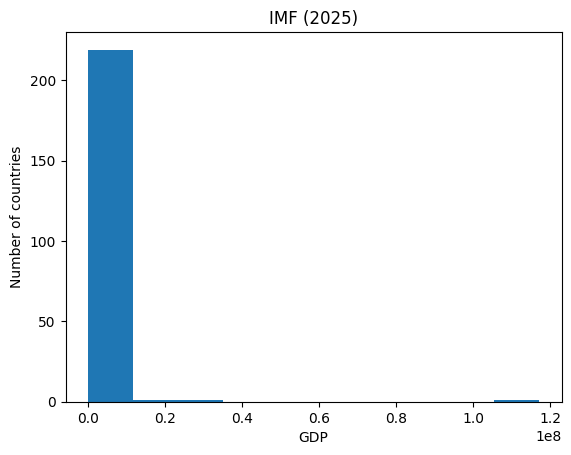

In [52]:
import matplotlib.pyplot as plt

# Build a histogram of IMF_Forecast
plt.hist(df['IMF(2025)'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

14. Розрахувати частку кожнох країни для кожного року

In [55]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF(2025)'] / df['IMF(2025)'].sum()
df['WB_Share'] = df['WorldBank(2024)'] / df['WorldBank(2024)'].sum()
df['UN_Share'] = df['UnitedNations(2023)'] / df['UnitedNations(2023)'].sum()

df.head(10)

,Country,IMF(2025),WorldBank(2024),UnitedNations(2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
0,World,117165394.0,111326370.0,100834796.0,5839024.0,5.240562e+07,0.499584,0.500606,0.487606
1,United States,30615743.0,29184890.0,27720700.0,1430853.0,1.392172e+07,0.130543,0.131237,0.134049
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0,9.019537e+06,0.082714,0.084286,0.086050
3,Germany,5013574.0,4659929.0,4525704.0,353645.0,2.199360e+06,0.021377,0.020955,0.021885
4,Japan,4279828.0,4026211.0,4204495.0,253617.0,1.961166e+06,0.018249,0.018105,0.020332
5,India,4125213.0,3912686.0,3575778.0,212527.0,1.843283e+06,0.017590,0.017594,0.017291
6,United Kingdom,3958780.0,3643834.0,3380855.0,314946.0,1.689703e+06,0.016880,0.016385,0.016349
7,France,3361557.0,3162079.0,3051832.0,199478.0,1.501653e+06,0.014333,0.014219,0.014758
8,Italy,2543677.0,2372775.0,2300941.0,170902.0,1.122076e+06,0.010846,0.010670,0.011127
9,Russia,2540656.0,2173836.0,2008419.0,366820.0,9.631075e+05,0.010833,0.009775,0.009712


15. Візуалізувати показники на графік (країни покаують зростання або спад)

In [56]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

,Country,IMF(2025),WorldBank(2024),UnitedNations(2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
0,World,117165394.0,111326370.0,100834796.0,5839024.0,5.240562e+07,0.499584,0.500606,0.487606,0.011979
1,United States,30615743.0,29184890.0,27720700.0,1430853.0,1.392172e+07,0.130543,0.131237,0.134049,0.003505
2,China[n 1],19398577.0,18743803.0,17794782.0,654774.0,9.019537e+06,0.082714,0.084286,0.086050,0.003336
4,Japan,4279828.0,4026211.0,4204495.0,253617.0,1.961166e+06,0.018249,0.018105,0.020332,0.002083
16,Turkey,1565471.0,1323255.0,1118253.0,242216.0,5.764683e+05,0.006675,0.005950,0.005408,0.001268
9,Russia,2540656.0,2173836.0,2008419.0,366820.0,9.631075e+05,0.010833,0.009775,0.009712,0.001121
11,Brazil,2256910.0,2179412.0,2191132.0,77498.0,1.066372e+06,0.009623,0.009800,0.010596,0.000972
14,South Korea,1858572.0,1712793.0,1839058.0,145779.0,8.313624e+05,0.007925,0.007702,0.008893,0.000968
15,Australia,1829508.0,1752193.0,1775628.0,77315.0,8.548437e+05,0.007801,0.007879,0.008586,0.000785
13,Mexico,1862740.0,1852723.0,1793799.0,10017.0,9.137082e+05,0.007943,0.008331,0.008674,0.000732


16. Побудова візуалізації

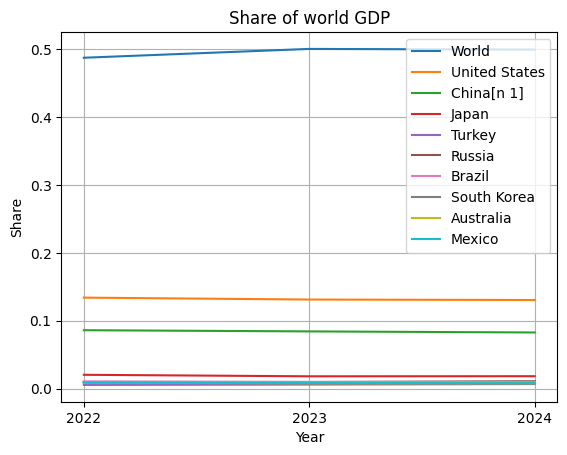

In [57]:
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()